<a href="https://colab.research.google.com/github/Sirfowahid/NDT-Project/blob/main/Copy_of_Bricks%26StoneChips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [ ]:
np.random.seed(42)

In [ ]:
def a20_index(y_train,y_pred):
  total = 0
  acc = 0
  for i in range(len(y_train.values)):

    temp = np.abs((y_pred[i]-y_train.values[i])/y_train.values[i])
    if temp<=0.2:
      total += 1
      acc += 1
    else:
      total += 1

  a20 = acc/total
  return a20

In [ ]:
def mape(y_true, y_pred):

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Avoid division by zero by adding a small epsilon to y_true
    epsilon = 1e-10
    mape_value = np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100
    return mape_value


In [ ]:
def vaf(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    numerator = np.var(y_true - y_pred)
    denominator = np.var(y_true)

    vaf_value = (1 - (numerator / denominator)) * 100
    return vaf_value


In [ ]:
def rsr(y_true, y_pred):

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Compute RMSE
    rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))

    # Compute standard deviation of y_true
    y_mean = np.mean(y_true)
    std_dev = np.sqrt(np.mean((y_true - y_mean) ** 2))

    rsr_value = rmse / std_dev
    return rsr_value


In [ ]:
def evaluation_metrics(y_true, y_pred):
  mae = mean_absolute_error(y_true, y_pred)
  r2 = r2_score(y_true, y_pred)
  rmse = np.sqrt(mean_squared_error(y_true, y_pred))
  mape_value = mape(y_true, y_pred)
  vaf_value = vaf(y_true, y_pred)
  rsr_value = rsr(y_true, y_pred)
  a20 = a20_index(y_true, y_pred)
  return mae, r2, rmse, mape_value, vaf_value, rsr_value, a20

In [ ]:
# Perform Randomized Search CV for each regressor
def randomized_search(model, param_grid, X, y, cv=5, n_iter=20):
    random_search = RandomizedSearchCV(
        estimator=model, param_distributions=param_grid,
        scoring='neg_mean_squared_error', cv=cv, n_iter=n_iter,
        verbose=1, random_state=42, n_jobs=-1
    )
    random_search.fit(X, y)
    return random_search.best_params_

In [ ]:
def randomized_search(model, param_grid, X, y, cv=5, n_iter=20):
    try:
        random_search = RandomizedSearchCV(
            estimator=model, param_distributions=param_grid,
            scoring='neg_mean_squared_error', cv=cv, n_iter=n_iter,
            verbose=1, random_state=42, n_jobs=-1
        )
        random_search.fit(X, y)
        return random_search.best_params_
    except AttributeError as e:
        print(f"Error in RandomizedSearchCV: {e}")


# Stone Chips

## EDA

In [ ]:
stone_df = pd.read_excel("/content/drive/MyDrive/Projects/28. Materials (Stone & Bricks)/UStone.xlsx")
stone_df.head()

,Actual Strength (MPa),UPV (m/s),RN
0,22.334836,4090,21.500000
1,21.718515,4090,21.333333
2,21.965002,4049,21.166667
3,20.615770,4132,21.500000
4,22.581324,4049,21.500000


In [ ]:
stone_df = stone_df.dropna()
stone_df.head()

,Actual Strength (MPa),UPV (m/s),RN
0,22.334836,4090,21.500000
1,21.718515,4090,21.333333
2,21.965002,4049,21.166667
3,20.615770,4132,21.500000
4,22.581324,4049,21.500000


In [ ]:
stone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Actual Strength (MPa)  75 non-null     float64
 1   UPV (m/s)              75 non-null     int64  
 2   RN                     75 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.9 KB


In [ ]:
stone_df.describe()

,Actual Strength (MPa),UPV (m/s),RN
count,75.000000,75.000000,75.000000
mean,29.637026,4292.213333,25.251111
std,6.144042,207.659824,3.042168
min,19.253368,3082.000000,20.166667
25%,24.368579,4175.000000,22.750000
50%,29.607000,4310.000000,24.833333
75%,34.522194,4454.000000,27.583333
max,44.013293,4662.000000,32.000000


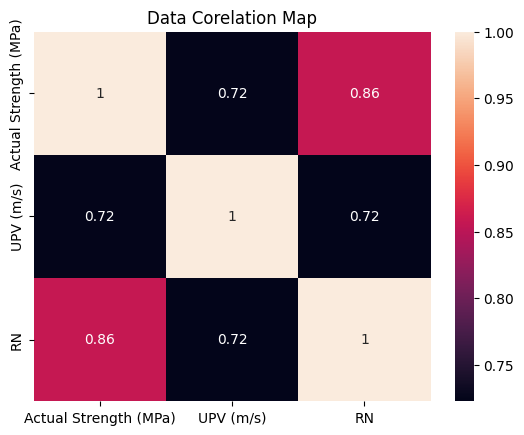

In [ ]:
sns.heatmap(stone_df.corr(), annot=True)
plt.title("Data Corelation Map")
plt.show()

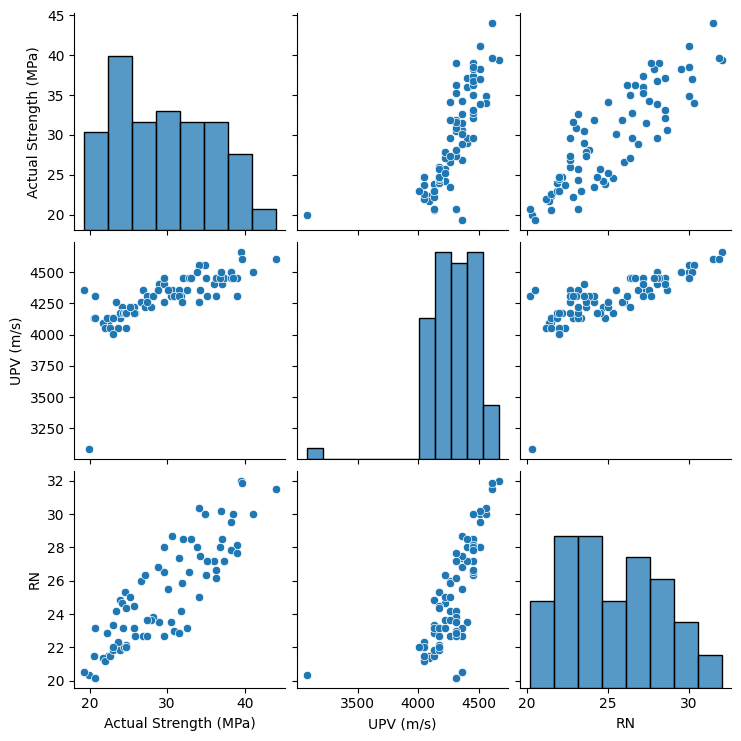

In [ ]:
sns.pairplot(stone_df)
plt.show()

## Data Preprocessing

In [ ]:
stone_df.columns

Index(['Actual Strength (MPa)', 'UPV (m/s)', 'RN'], dtype='object')

In [ ]:
X = stone_df.drop("Actual Strength (MPa)", axis=1)
y = stone_df["Actual Strength (MPa)"]

In [ ]:
X.head()

,UPV (m/s),RN
0,4090,21.500000
1,4090,21.333333
2,4049,21.166667
3,4132,21.500000
4,4049,21.500000


In [ ]:
X.shape

(75, 2)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((52, 2), (23, 2), (52,), (23,))

In [ ]:
Train = X_train
Train["Actual"] = y_train
Test = X_test
Test["Actual"] = y_test
Full = X
Full["Actual"] = y

In [ ]:
# Train = X_train.copy()
# Train["Actual"] = y_train.copy()

# Test = X_test.copy()
# Test["Actual"] = y_test.copy()

# Full = X.copy()
# Full["Actual"] = y.copy()

In [ ]:
X.shape

(75, 3)

In [ ]:
X.head()

,UPV (m/s),RN,Actual
0,4090,21.500000,22.334836
1,4090,21.333333,21.718515
2,4049,21.166667,21.965002
3,4132,21.500000,20.615770
4,4049,21.500000,22.581324


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.transform(X)

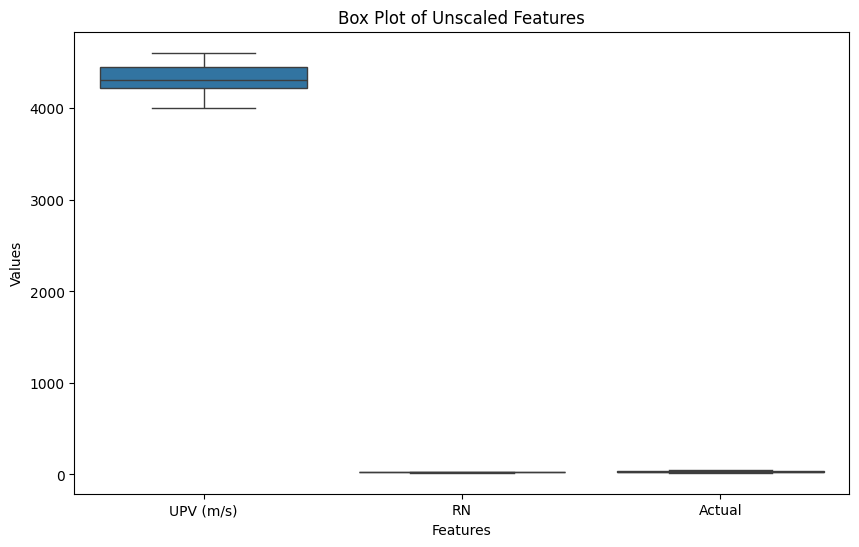

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(X_train)
plt.title("Box Plot of Unscaled Features")
plt.xlabel("Features")
plt.ylabel("Values")
#plt.set_xticklabels(X_train.columns, rotation=45)
plt.show()

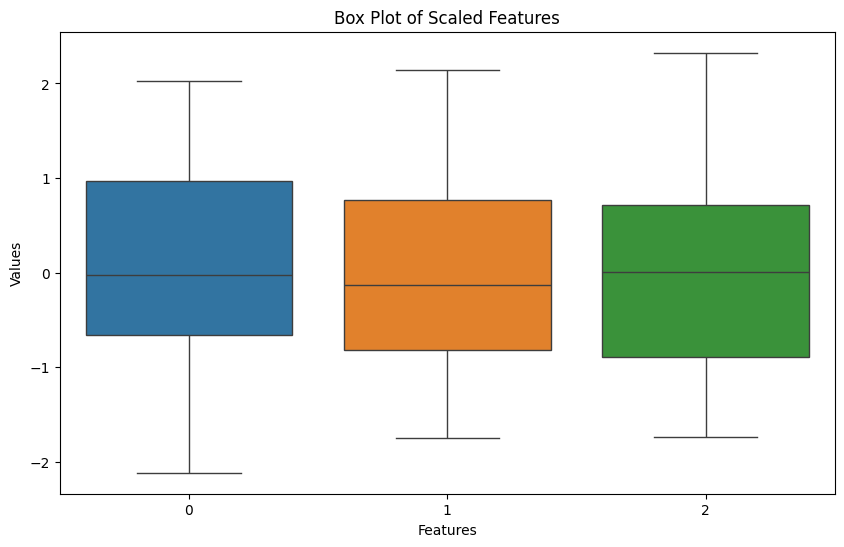

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(X_train_scaled)
plt.title("Box Plot of Scaled Features")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()

In [ ]:
import tensorflow as tf

ann = tf.keras.models.Sequential([
    tf.keras.Input(shape=(2,)),
    tf.keras.layers.Dense(16),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(8),
    tf.keras.layers.Dense(1)
])

ann.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 865 (3.38 KB)

 Trainable params: 865 (3.38 KB)

 Non-trainable params: 0 (0.00 B)

## ANN

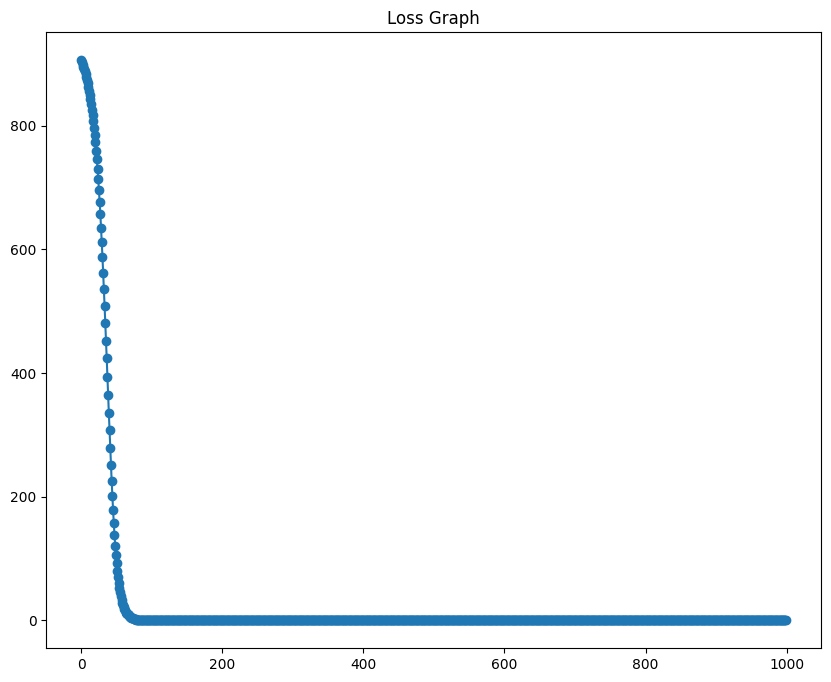

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
ANN Metrics:
MAE: 1.2431567751510404e-06
R2 Score: 0.9999999999999373
RMSE: 1.5281348838965982e-06
MAPE: 4.202912859091825e-06
VAF: 99.99999999999376
RSR: 2.503930786556426e-07
A20: 1.0


In [ ]:
import tensorflow as tf
ann = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16,input_shape=(X_scaled.shape[1],)),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(8),
    tf.keras.layers.Dense(1)
])

ann.compile(optimizer='adam',loss='mse')

r = ann.fit(X_scaled, y,epochs=1000,verbose=0)

plt.figure(figsize=(10,8))
plt.plot(r.history['loss'],'o-')
plt.title('Loss Graph')
plt.show()

y_pred = ann.predict(X_scaled)
mae, r2, rmse, mape_value, vaf_value, rsr_value, a20 = evaluation_metrics(y, y_pred.reshape(-1))
print("ANN Metrics:")
print("MAE:", mae)
print("R2 Score:", r2)
print("RMSE:", rmse)
print("MAPE:", mape_value)
print("VAF:", vaf_value)
print("RSR:", rsr_value)
print("A20:", a20)

In [ ]:
y_pred_train = ann.predict(X_train_scaled)

mae, r2, rmse, mape_value, vaf_value, rsr_value, a20 = evaluation_metrics(y_train, y_pred_train.reshape(-1))
print("ANN Train Metrics:")
print("MAE:", mae)
print("R2 Score:", r2)
print("RMSE:", rmse)
print("MAPE:", mape_value)
print("VAF:", vaf_value)
print("RSR:", rsr_value)
print("A20:", a20)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
ANN Train Metrics:
MAE: 1.2557303107768164e-06
R2 Score: 0.999999999999935
RMSE: 1.5540455995837027e-06
MAPE: 4.214770458922384e-06
VAF: 99.99999999999353
RSR: 2.548724116220221e-07
A20: 1.0


In [ ]:
y_pred_test = ann.predict(X_test_scaled)

print(y_pred_test.shape)

mae, r2, rmse, mape_value, vaf_value, rsr_value, a20 = evaluation_metrics(y_test, y_pred_test.reshape(-1))
print("ANN Test Metrics:")
print("MAE:", mae)
print("R2 Score:", r2)
print("RMSE:", rmse)
print("MAPE:", mape_value)
print("VAF:", vaf_value)
print("RSR:", rsr_value)
print("A20:", a20)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
(23, 1)
ANN Test Metrics:
MAE: 1.2322829529347987e-06
R2 Score: 0.9999999999999402
RMSE: 1.4905033767232363e-06
MAPE: 4.288916852882867e-06
VAF: 99.9999999999943
RSR: 2.44705257935614e-07
A20: 1.0


In [ ]:
Train["ANN Predicted"] = y_pred_train
Test["ANN Predicted"] = y_pred_test
Full["ANN Predicted"] = y_pred

## CNN

In [ ]:
X_scaled.shape

(75, 3)

In [ ]:
n_sample,n_features = X_scaled.shape
print(n_sample,n_features)
X_scaled_reshaped = X_scaled.reshape((n_sample,n_features,1))

75 3


In [ ]:
n_sample,n_features = X_train_scaled.shape
print(n_sample,n_features)
X_train_scaled_reshaped = X_train_scaled.reshape((n_sample,n_features,1))

52 3


In [ ]:
n_sample,n_features = X_test_scaled.shape
print(n_sample,n_features)
X_test_scaled_reshaped = X_test_scaled.reshape((n_sample,n_features,1))

23 3


In [ ]:
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(8,kernel_size=1,activation='relu',input_shape=(2,1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(1),

])

cnn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 2, 8)           │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 1, 8)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 97 (388.00 B)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 0 (0.00 B)

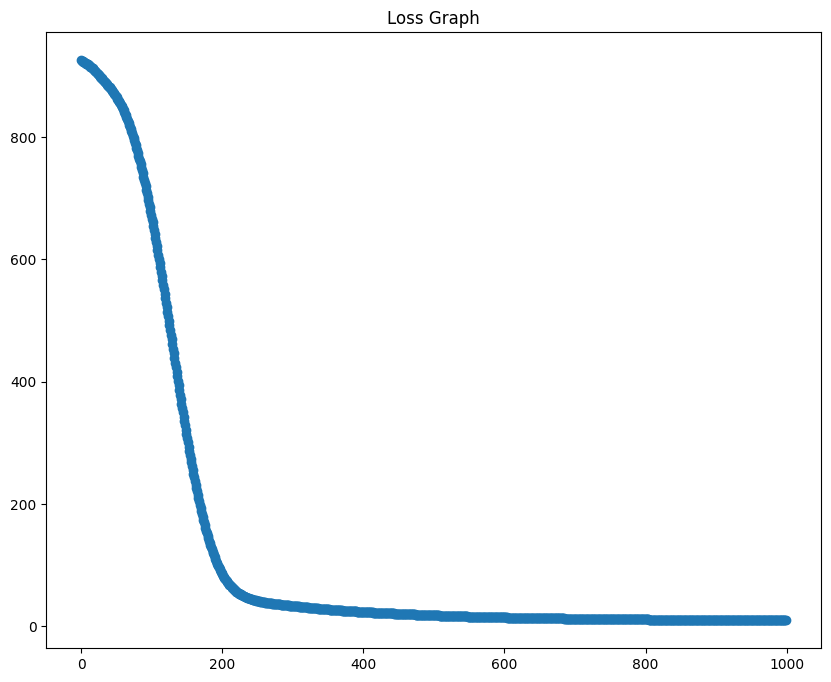

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
CNN Metrics:
MAE: 2.522249251216152
R2 Score: 0.7367360248382282
RMSE: 3.1313750518374914
MAPE: 8.733383859122142
VAF: 73.68357212556707
RSR: 0.51309256003354
A20: 0.9733333333333334


In [ ]:
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(8,kernel_size=1,activation='relu',input_shape=(n_features,1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(1),

])

cnn.compile(optimizer='adam',loss='mse')

r = cnn.fit(X_scaled, y,epochs=1000,verbose=0)

plt.figure(figsize=(10,8))
plt.plot(r.history['loss'],'o-')
plt.title('Loss Graph')
plt.show()

y_pred = cnn.predict(X_scaled)
mae, r2, rmse, mape_value, vaf_value, rsr_value, a20 = evaluation_metrics(y, y_pred.reshape(-1))
print("CNN Metrics:")
print("MAE:", mae)
print("R2 Score:", r2)
print("RMSE:", rmse)
print("MAPE:", mape_value)
print("VAF:", vaf_value)
print("RSR:", rsr_value)
print("A20:", a20)

In [ ]:
y_pred_train = cnn.predict(X_train_scaled)

mae, r2, rmse, mape_value, vaf_value, rsr_value, a20 = evaluation_metrics(y_train, y_pred_train.reshape(-1))
print("CNN Train Metrics:")
print("MAE:", mae)
print("R2 Score:", r2)
print("RMSE:", rmse)
print("MAPE:", mape_value)
print("VAF:", vaf_value)
print("RSR:", rsr_value)
print("A20:", a20)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
CNN Train Metrics:
MAE: 2.7181831739086464
R2 Score: 0.694412993781267
RMSE: 3.3706089647293784
MAPE: 9.490401953082667
VAF: 69.48267046884146
RSR: 0.5527992458557927
A20: 0.9615384615384616


In [ ]:
y_pred_test = cnn.predict(X_test_scaled)

mae, r2, rmse, mape_value, vaf_value, rsr_value, a20 = evaluation_metrics(y_test, y_pred_test.reshape(-1))
print("CNN Test Metrics:")
print("MAE:", mae)
print("R2 Score:", r2)
print("RMSE:", rmse)
print("MAPE:", mape_value)
print("VAF:", vaf_value)
print("RSR:", rsr_value)
print("A20:", a20)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
CNN Test Metrics:
MAE: 2.079268208607033
R2 Score: 0.8304943450591266
RMSE: 2.507735678840125
MAPE: 7.02186469016792
VAF: 83.66811994647479
RSR: 0.4117106446776346
A20: 1.0


In [ ]:
Train["CNN Predicted"] = y_pred_train
Test["CNN Predicted"] = y_pred_test
Full["CNN Predicted"] = y_pred

## LSTM

In [ ]:
lstm = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(16,input_shape=(2,1)),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1)
])

lstm.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 16)             │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,441 (5.63 KB)

 Trainable params: 1,441 (5.63 KB)

 Non-trainable params: 0 (0.00 B)

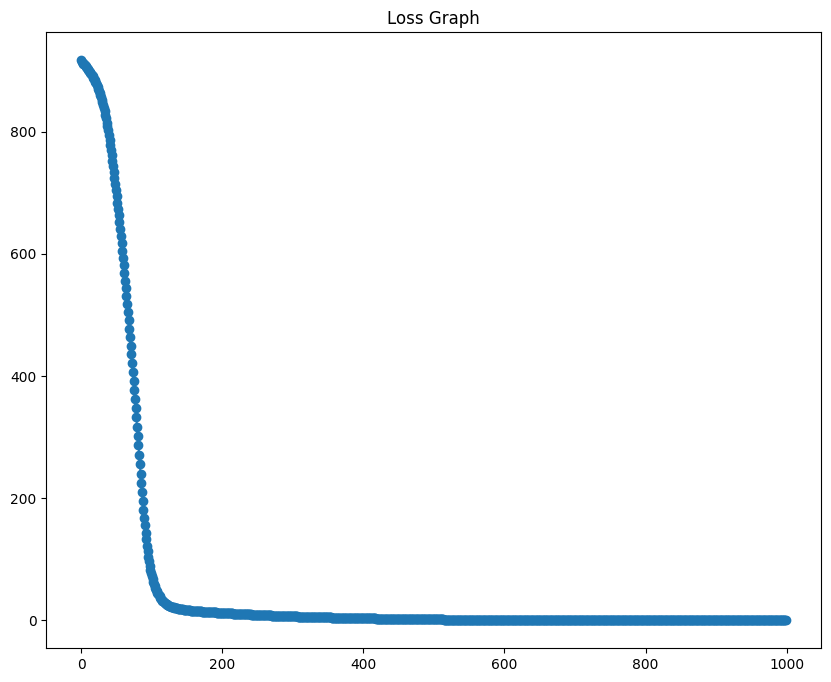

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step
LSTM Metrics:
MAE: 0.18924836278524468
R2 Score: 0.9980794144380817
RMSE: 0.2674583738054115
MAPE: 0.659253421148087
VAF: 99.80816124371847
RSR: 0.04382448587169364
A20: 1.0


In [ ]:
lstm = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(16,input_shape=(n_features,1)),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1)
])

lstm.compile(optimizer='adam',loss='mse')

r = lstm.fit(X_scaled, y,epochs=1000,verbose=0)

plt.figure(figsize=(10,8))
plt.plot(r.history['loss'],'o-')
plt.title('Loss Graph')
plt.show()

y_pred = lstm.predict(X_scaled)
mae, r2, rmse, mape_value, vaf_value, rsr_value, a20 = evaluation_metrics(y, y_pred.reshape(-1))
print("LSTM Metrics:")
print("MAE:", mae)
print("R2 Score:", r2)
print("RMSE:", rmse)
print("MAPE:", mape_value)
print("VAF:", vaf_value)
print("RSR:", rsr_value)
print("A20:", a20)

In [ ]:
y_pred_train = lstm.predict(X_train_scaled)

mae, r2, rmse, mape_value, vaf_value, rsr_value, a20 = evaluation_metrics(y_train, y_pred_train.reshape(-1))
print("LSTM Train Metrics:")
print("MAE:", mae)
print("R2 Score:", r2)
print("RMSE:", rmse)
print("MAPE:", mape_value)
print("VAF:", vaf_value)
print("RSR:", rsr_value)
print("A20:", a20)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
LSTM Train Metrics:
MAE: 0.18675407287318022
R2 Score: 0.9979261351975967
RMSE: 0.2776714000594012
MAPE: 0.6299455123828129
VAF: 99.79277875639487
RSR: 0.04553970577862126
A20: 1.0


In [ ]:
y_pred_test = lstm.predict(X_test_scaled)

mae, r2, rmse, mape_value, vaf_value, rsr_value, a20 = evaluation_metrics(y_test, y_pred_test.reshape(-1))
print("LSTM Test Metrics:")
print("MAE:", mae)
print("R2 Score:", r2)
print("RMSE:", rmse)
print("MAPE:", mape_value)
print("VAF:", vaf_value)
print("RSR:", rsr_value)
print("A20:", a20)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
LSTM Test Metrics:
MAE: 0.19488812450346849
R2 Score: 0.9984111523414313
RMSE: 0.24278999846014682
MAPE: 0.7255163395886287
VAF: 99.84712651266337
RSR: 0.039860351962429305
A20: 1.0


In [ ]:
Train["LSTM Predicted"] = y_pred_train
Test["LSTM Predicted"] = y_pred_test
Full["LSTM Predicted"] = y_pred

## GRU

In [ ]:
gru = tf.keras.models.Sequential([
    tf.keras.layers.GRU(16,input_shape=(2,1)),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1)
])

gru.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 16)             │           912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,201 (4.69 KB)

 Trainable params: 1,201 (4.69 KB)

 Non-trainable params: 0 (0.00 B)

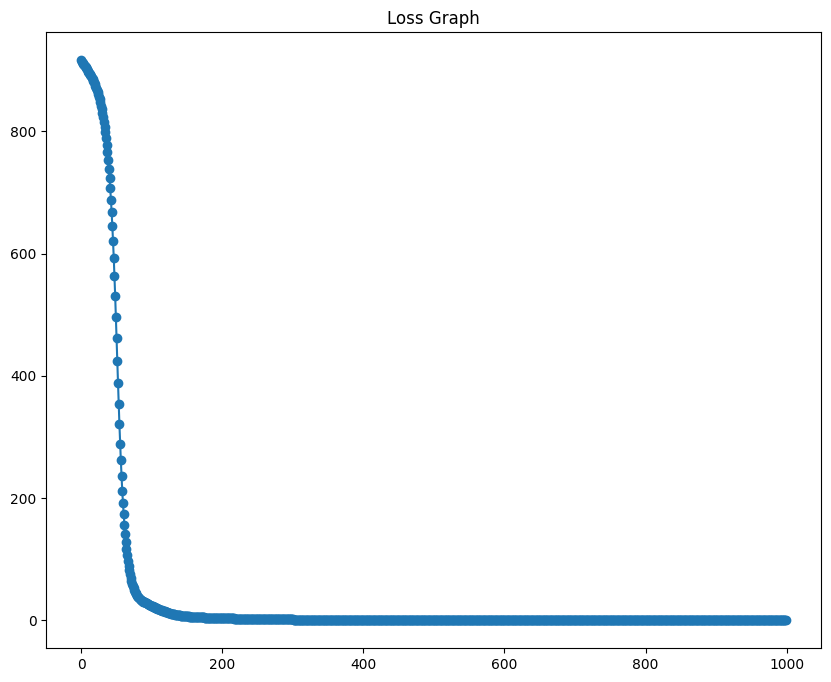

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
GRU Metrics:
MAE: 0.14357346885847888
R2 Score: 0.9988315630739508
RMSE: 0.20861330646610105
MAPE: 0.5194114685907231
VAF: 99.88477039698105
RSR: 0.03418240667432774
A20: 1.0


In [ ]:
gru = tf.keras.models.Sequential([
    tf.keras.layers.GRU(16,input_shape=(n_features,1)),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1)
])

gru.compile(optimizer='adam',loss='mse')

r = gru.fit(X_scaled, y,epochs=1000,verbose=0)

plt.figure(figsize=(10,8))
plt.plot(r.history['loss'],'o-')
plt.title('Loss Graph')
plt.show()

y_pred = gru.predict(X_scaled)
mae, r2, rmse, mape_value, vaf_value, rsr_value, a20 = evaluation_metrics(y, y_pred.reshape(-1))
print("GRU Metrics:")
print("MAE:", mae)
print("R2 Score:", r2)
print("RMSE:", rmse)
print("MAPE:", mape_value)
print("VAF:", vaf_value)
print("RSR:", rsr_value)
print("A20:", a20)


In [ ]:
y_pred_train = gru.predict(X_train_scaled)

mae, r2, rmse, mape_value, vaf_value, rsr_value, a20 = evaluation_metrics(y_train, y_pred_train.reshape(-1))
print("GRU Train Metrics:")
print("MAE:", mae)
print("R2 Score:", r2)
print("RMSE:", rmse)
print("MAPE:", mape_value)
print("VAF:", vaf_value)
print("RSR:", rsr_value)
print("A20:", a20)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
GRU Train Metrics:
MAE: 0.14915818705247563
R2 Score: 0.9986798622244853
RMSE: 0.22153918765164807
MAPE: 0.5394684277931215
VAF: 99.87176981567517
RSR: 0.03633370027281366
A20: 1.0


In [ ]:
y_pred_test = gru.predict(X_test_scaled)

mae, r2, rmse, mape_value, vaf_value, rsr_value, a20 = evaluation_metrics(y_test, y_pred_test.reshape(-1))
print("GRU Test Metrics:")
print("MAE:", mae)
print("R2 Score:", r2)
print("RMSE:", rmse)
print("MAPE:", mape_value)
print("VAF:", vaf_value)
print("RSR:", rsr_value)
print("A20:", a20)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
GRU Test Metrics:
MAE: 0.1309473982479601
R2 Score: 0.9991658084170584
RMSE: 0.1759229767223531
MAPE: 0.4740660374254418
VAF: 99.91664402007075
RSR: 0.028882374953275957
A20: 1.0


In [ ]:
Train["GRU Predicted"] = y_pred_train
Test["GRU Predicted"] = y_pred_test
Full["GRU Predicted"] = y_pred

## Exporting Results

In [ ]:
Full.head()

,UPV (m/s),RN,Actual,ANN Predicted,CNN Predicted,LSTM Predicted,GRU Predicted
0,4090,21.500000,22.334836,22.334837,22.019083,22.193926,22.182796
1,4090,21.333333,21.718515,21.718515,21.881796,21.656616,21.637611
2,4049,21.166667,21.965002,21.965002,21.731243,21.853731,21.783424
3,4132,21.500000,20.615770,20.615770,22.127670,20.820669,20.842930
4,4049,21.500000,22.581324,22.581326,22.019083,22.437460,22.369385


In [ ]:
Train.to_excel("/content/drive/MyDrive/Projects/28. Materials (Stone & Bricks)/Updated_StoneChips_Train.xlsx", index=False)
Test.to_excel("/content/drive/MyDrive/Projects/28. Materials (Stone & Bricks)/Updated_StoneChips_Test.xlsx", index=False)
Full.to_excel("/content/drive/MyDrive/Projects/28. Materials (Stone & Bricks)/Updated_StoneChips_Full.xlsx", index=False)

# Brick Chips

## EDA

In [ ]:
brick_df = pd.read_excel("/content/drive/MyDrive/Projects/28. Materials (Stone & Bricks)/UBrick.xlsx")
brick_df.head()

,Actual Strength (MPa),UPV (m/s),RN
0,21.595237,3781,20.666667
1,20.855707,3745,20.666667
2,20.978985,3676,20.666667
3,22.819468,3781,21.666667
4,20.838056,3854,21.500000


In [ ]:
brick_df = brick_df.dropna()
brick_df.head()

,Actual Strength (MPa),UPV (m/s),RN
0,21.595237,3781,20.666667
1,20.855707,3745,20.666667
2,20.978985,3676,20.666667
3,22.819468,3781,21.666667
4,20.838056,3854,21.500000


In [ ]:
brick_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Actual Strength (MPa)  75 non-null     float64
 1   UPV (m/s)              75 non-null     int64  
 2   RN                     75 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.9 KB


In [ ]:
brick_df.describe()

,Actual Strength (MPa),UPV (m/s),RN
count,75.000000,75.000000,75.000000
mean,29.132935,4083.813333,24.037778
std,5.863900,219.999244,2.278733
min,18.606020,3082.000000,20.166667
25%,24.615101,3968.000000,22.333333
50%,28.867538,4090.000000,23.666667
75%,34.443491,4264.000000,25.833333
max,39.467726,4357.000000,28.333333


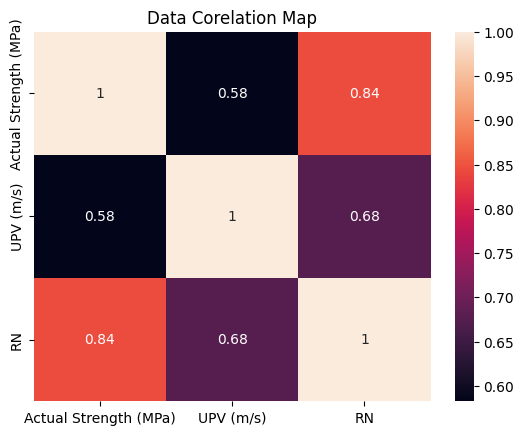

In [ ]:
sns.heatmap(brick_df.corr(), annot=True)
plt.title("Data Corelation Map")
plt.show()

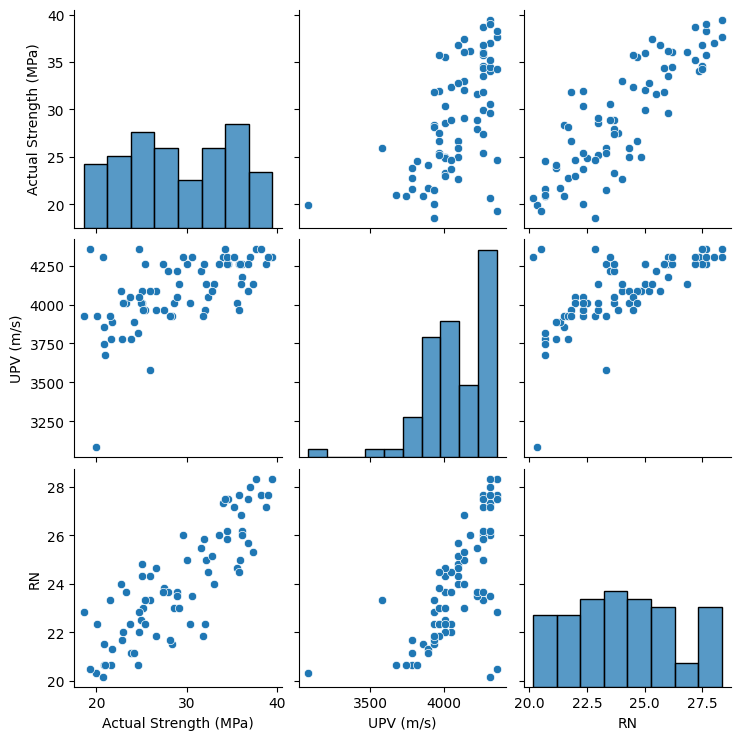

In [ ]:
sns.pairplot(brick_df)
plt.show()

## Data Preprocessing

In [ ]:
brick_df.columns

Index(['Actual Strength (MPa)', 'UPV (m/s)', 'RN'], dtype='object')

In [ ]:
X = brick_df.drop("Actual Strength (MPa)", axis=1)
y = brick_df["Actual Strength (MPa)"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
Train = X_train
Train["Actual"] = y_train
Test = X_test
Test["Actual"] = y_test
Full = X
Full["Actual"] = y

In [ ]:
# Train = X_train.copy()
# Train["Actual"] = y_train.copy()

# Test = X_test.copy()
# Test["Actual"] = y_test.copy()

# Full = X.copy()
# Full["Actual"] = y.copy()

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.transform(X)

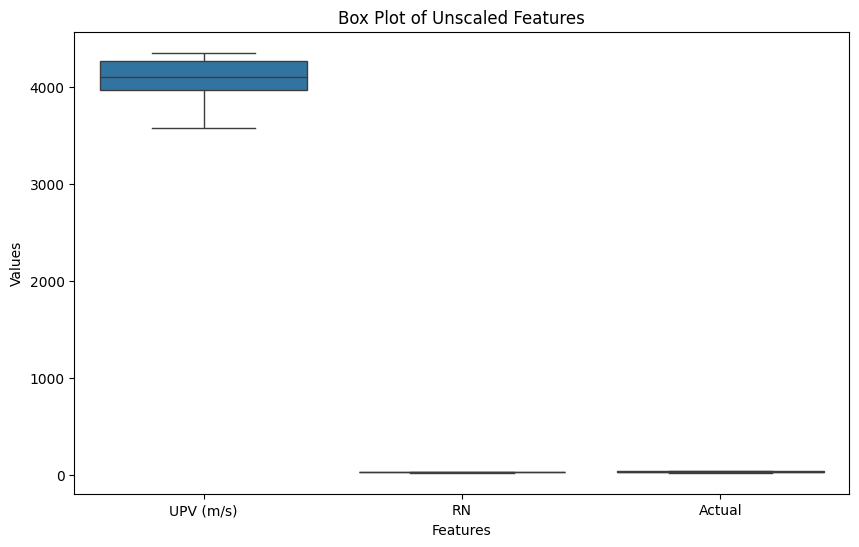

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(X_train)
plt.title("Box Plot of Unscaled Features")
plt.xlabel("Features")
plt.ylabel("Values")
#plt.set_xticklabels(X_train.columns, rotation=45)
plt.show()

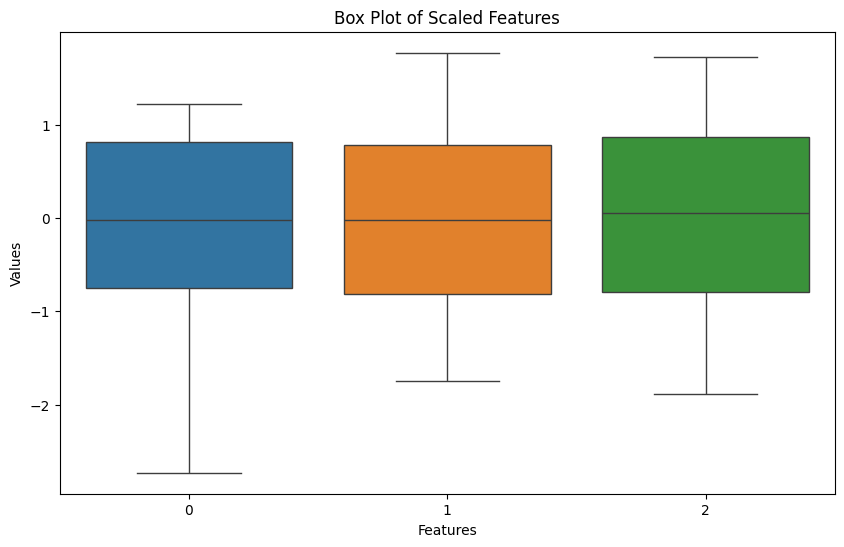

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(X_train_scaled)
plt.title("Box Plot of Scaled Features")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()

## ANN

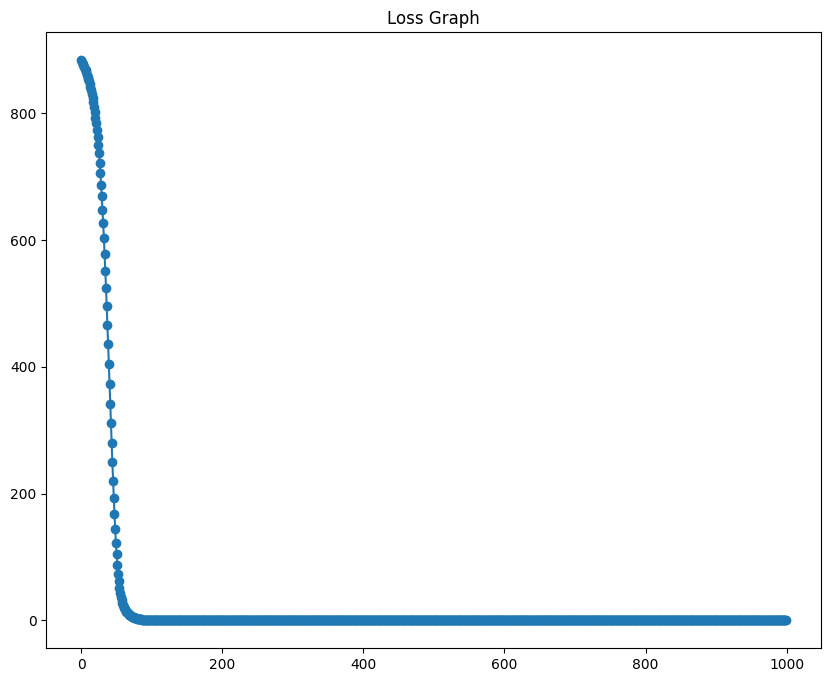

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
ANN Metrics:
MAE: 1.2447404677592052e-06
R2 Score: 0.9999999999999215
RMSE: 1.6321225293890805e-06
MAPE: 4.255448480158977e-06
VAF: 99.99999999999217
RSR: 2.802082970241191e-07
A20: 1.0


In [ ]:
import tensorflow as tf
ann = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16,input_shape=(X_scaled.shape[1],)),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(8),
    tf.keras.layers.Dense(1)
])

ann.compile(optimizer='adam',loss='mse')

r = ann.fit(X_scaled, y,epochs=1000,verbose=0)

plt.figure(figsize=(10,8))
plt.plot(r.history['loss'],'o-')
plt.title('Loss Graph')
plt.show()

y_pred = ann.predict(X_scaled)
mae, r2, rmse, mape_value, vaf_value, rsr_value, a20 = evaluation_metrics(y, y_pred.reshape(-1))
print("ANN Metrics:")
print("MAE:", mae)
print("R2 Score:", r2)
print("RMSE:", rmse)
print("MAPE:", mape_value)
print("VAF:", vaf_value)
print("RSR:", rsr_value)
print("A20:", a20)

In [ ]:
y_pred_train = ann.predict(X_train_scaled)

mae, r2, rmse, mape_value, vaf_value, rsr_value, a20 = evaluation_metrics(y_train, y_pred_train.reshape(-1))
print("ANN Train Metrics:")
print("MAE:", mae)
print("R2 Score:", r2)
print("RMSE:", rmse)
print("MAPE:", mape_value)
print("VAF:", vaf_value)
print("RSR:", rsr_value)
print("A20:", a20)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
ANN Train Metrics:
MAE: 1.3309916644388409e-06
R2 Score: 0.9999999999999046
RMSE: 1.777575685139589e-06
MAPE: 4.52234893017628e-06
VAF: 99.99999999999052
RSR: 3.087699621153382e-07
A20: 1.0


In [ ]:
y_pred_test = ann.predict(X_test_scaled)

mae, r2, rmse, mape_value, vaf_value, rsr_value, a20 = evaluation_metrics(y_test, y_pred_test.reshape(-1))
print("ANN Test Metrics:")
print("MAE:", mae)
print("R2 Score:", r2)
print("RMSE:", rmse)
print("MAPE:", mape_value)
print("VAF:", vaf_value)
print("RSR:", rsr_value)
print("A20:", a20)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
ANN Test Metrics:
MAE: 1.0479904366147623e-06
R2 Score: 0.9999999999999516
RMSE: 1.2969124537523596e-06
MAPE: 3.6224048591954776e-06
VAF: 99.99999999999525
RSR: 2.1999159984828243e-07
A20: 1.0


In [ ]:
Train["ANN Predicted"] = y_pred_train
Test["ANN Predicted"] = y_pred_test
Full["ANN Predicted"] = y_pred

## CNN

In [ ]:
n_sample,n_features = X_scaled.shape
print(n_sample,n_features)
X_scaled_reshaped = X_scaled.reshape((n_sample,n_features,1))

75 3


In [ ]:
n_sample,n_features = X_train_scaled.shape
print(n_sample,n_features)
X_train_scaled_reshaped = X_train_scaled.reshape((n_sample,n_features,1))

52 3


In [ ]:
n_sample,n_features = X_test_scaled.shape
print(n_sample,n_features)
X_test_scaled_reshaped = X_test_scaled.reshape((n_sample,n_features,1))

23 3


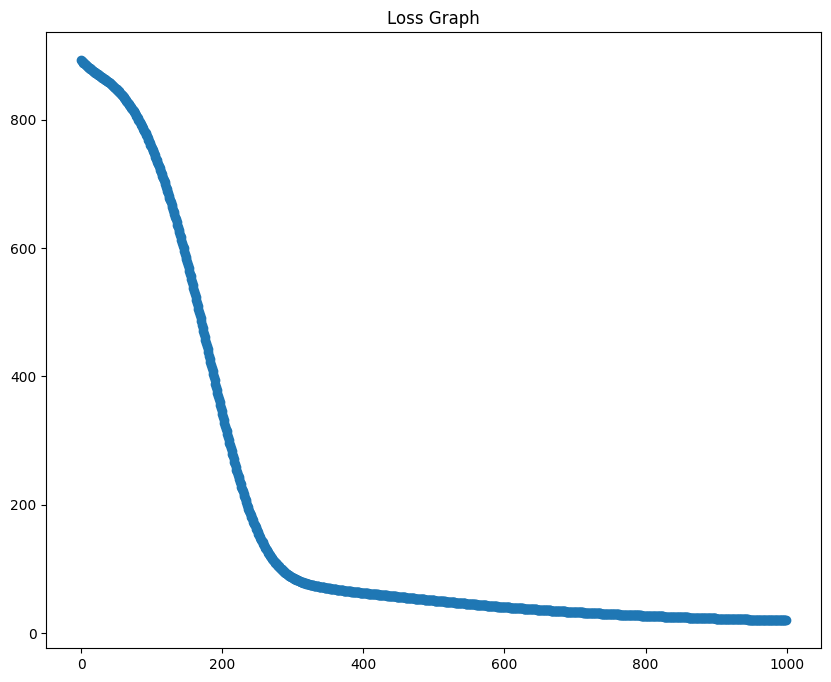

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
CNN Metrics:
MAE: 3.35695392590214
R2 Score: 0.4103001607159391
RMSE: 4.4728802761111455
MAPE: 12.341189339105853
VAF: 41.247870703892296
RSR: 0.7679191619461393
A20: 0.8933333333333333


In [ ]:
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(8,kernel_size=1,activation='relu',input_shape=(n_features,1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(1),

])

cnn.compile(optimizer='adam',loss='mse')

r = cnn.fit(X_scaled, y,epochs=1000,verbose=0)

plt.figure(figsize=(10,8))
plt.plot(r.history['loss'],'o-')
plt.title('Loss Graph')
plt.show()

y_pred = cnn.predict(X_scaled)
mae, r2, rmse, mape_value, vaf_value, rsr_value, a20 = evaluation_metrics(y, y_pred.reshape(-1))
print("CNN Metrics:")
print("MAE:", mae)
print("R2 Score:", r2)
print("RMSE:", rmse)
print("MAPE:", mape_value)
print("VAF:", vaf_value)
print("RSR:", rsr_value)
print("A20:", a20)

In [ ]:
y_pred_train = cnn.predict(X_train_scaled)

mae, r2, rmse, mape_value, vaf_value, rsr_value, a20 = evaluation_metrics(y_train, y_pred_train.reshape(-1))
print("CNN Train Metrics:")
print("MAE:", mae)
print("R2 Score:", r2)
print("RMSE:", rmse)
print("MAPE:", mape_value)
print("VAF:", vaf_value)
print("RSR:", rsr_value)
print("A20:", a20)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
CNN Train Metrics:
MAE: 3.6054523644331797
R2 Score: 0.27950452829993844
RMSE: 4.886621307841408
MAPE: 13.42344868960307
VAF: 27.954228036232976
RSR: 0.8488200467119408
A20: 0.8653846153846154


In [ ]:
y_pred_test = cnn.predict(X_test_scaled)

mae, r2, rmse, mape_value, vaf_value, rsr_value, a20 = evaluation_metrics(y_test, y_pred_test.reshape(-1))
print("CNN Test Metrics:")
print("MAE:", mae)
print("R2 Score:", r2)
print("RMSE:", rmse)
print("MAPE:", mape_value)
print("VAF:", vaf_value)
print("RSR:", rsr_value)
print("A20:", a20)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
CNN Test Metrics:
MAE: 2.795131618007872
R2 Score: 0.6762520726283149
RMSE: 3.3543475679479227
MAPE: 9.89434284795242
VAF: 70.31295118791019
RSR: 0.5689885125129374
A20: 0.9565217391304348


In [ ]:
Train["CNN Predicted"] = y_pred_train
Test["CNN Predicted"] = y_pred_test
Full["CNN Predicted"] = y_pred

## LSTM

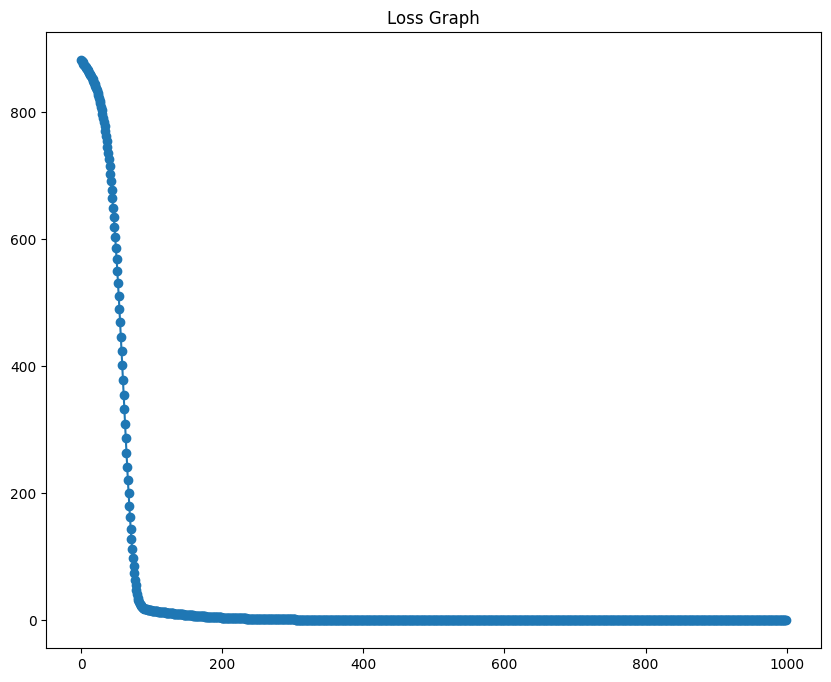

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
LSTM Metrics:
MAE: 0.13579924106385255
R2 Score: 0.9990010894094304
RMSE: 0.18409206860223917
MAPE: 0.5212135270957142
VAF: 99.90069308084817
RSR: 0.03160554683231362
A20: 1.0


In [ ]:
lstm = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(16,input_shape=(n_features,1)),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1)
])

lstm.compile(optimizer='adam',loss='mse')

r = lstm.fit(X_scaled, y,epochs=1000,verbose=0)

plt.figure(figsize=(10,8))
plt.plot(r.history['loss'],'o-')
plt.title('Loss Graph')
plt.show()

y_pred = lstm.predict(X_scaled)
mae, r2, rmse, mape_value, vaf_value, rsr_value, a20 = evaluation_metrics(y, y_pred.reshape(-1))
print("LSTM Metrics:")
print("MAE:", mae)
print("R2 Score:", r2)
print("RMSE:", rmse)
print("MAPE:", mape_value)
print("VAF:", vaf_value)
print("RSR:", rsr_value)
print("A20:", a20)

In [ ]:
y_pred_train = lstm.predict(X_train_scaled)

mae, r2, rmse, mape_value, vaf_value, rsr_value, a20 = evaluation_metrics(y_train, y_pred_train.reshape(-1))
print("LSTM Train Metrics:")
print("MAE:", mae)
print("R2 Score:", r2)
print("RMSE:", rmse)
print("MAPE:", mape_value)
print("VAF:", vaf_value)
print("RSR:", rsr_value)
print("A20:", a20)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
LSTM Train Metrics:
MAE: 0.12843081736600534
R2 Score: 0.9990787475006371
RMSE: 0.17473600255797908
MAPE: 0.4854437006173681
VAF: 99.91253141715427
RSR: 0.030352141594340055
A20: 1.0


In [ ]:
y_pred_test = lstm.predict(X_test_scaled)

mae, r2, rmse, mape_value, vaf_value, rsr_value, a20 = evaluation_metrics(y_test, y_pred_test.reshape(-1))
print("LSTM Test Metrics:")
print("MAE:", mae)
print("R2 Score:", r2)
print("RMSE:", rmse)
print("MAPE:", mape_value)
print("VAF:", vaf_value)
print("RSR:", rsr_value)
print("A20:", a20)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
LSTM Test Metrics:
MAE: 0.15245787130493474
R2 Score: 0.9988064798901313
RMSE: 0.20366642164548285
MAPE: 0.6020828925014462
VAF: 99.88594694886328
RSR: 0.03454736038930809
A20: 1.0


In [ ]:
Train["LSTM Predicted"] = y_pred_train
Test["LSTM Predicted"] = y_pred_test
Full["LSTM Predicted"] = y_pred

## GRU

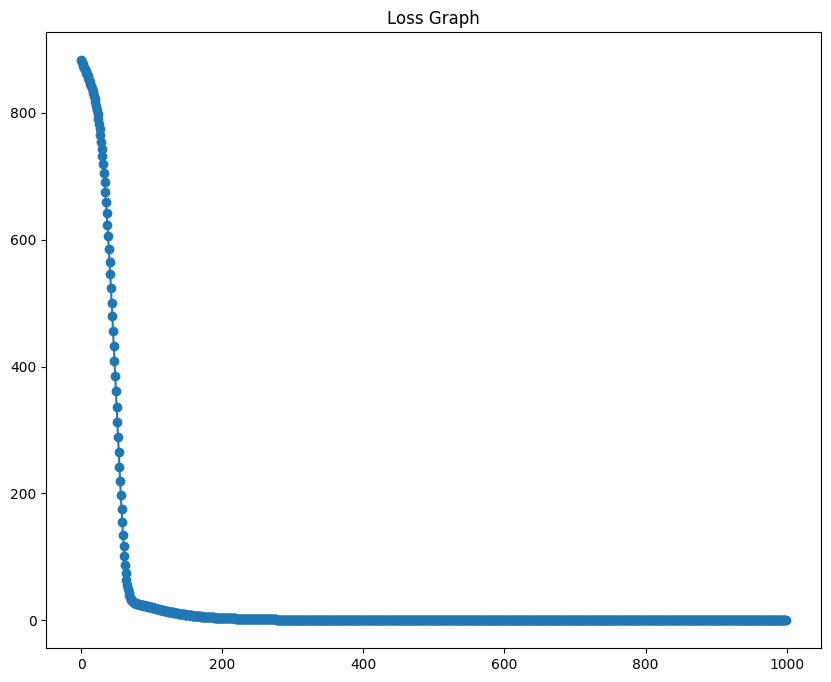

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
GRU Metrics:
MAE: 0.14549824944039222
R2 Score: 0.9989273964631132
RMSE: 0.19076178667257593
MAPE: 0.5342746485005931
VAF: 99.89313715038129
RSR: 0.03275062651136174
A20: 1.0


In [ ]:
gru = tf.keras.models.Sequential([
    tf.keras.layers.GRU(16,input_shape=(n_features,1)),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1)
])

gru.compile(optimizer='adam',loss='mse')

r = gru.fit(X_scaled, y,epochs=1000,verbose=0)

plt.figure(figsize=(10,8))
plt.plot(r.history['loss'],'o-')
plt.title('Loss Graph')
plt.show()

y_pred = gru.predict(X_scaled)
mae, r2, rmse, mape_value, vaf_value, rsr_value, a20 = evaluation_metrics(y, y_pred.reshape(-1))
print("GRU Metrics:")
print("MAE:", mae)
print("R2 Score:", r2)
print("RMSE:", rmse)
print("MAPE:", mape_value)
print("VAF:", vaf_value)
print("RSR:", rsr_value)
print("A20:", a20)


In [ ]:
y_pred_train = gru.predict(X_train_scaled)

mae, r2, rmse, mape_value, vaf_value, rsr_value, a20 = evaluation_metrics(y_train, y_pred_train.reshape(-1))
print("GRU Train Metrics:")
print("MAE:", mae)
print("R2 Score:", r2)
print("RMSE:", rmse)
print("MAPE:", mape_value)
print("VAF:", vaf_value)
print("RSR:", rsr_value)
print("A20:", a20)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
GRU Train Metrics:
MAE: 0.15657867662072922
R2 Score: 0.998743694609906
RMSE: 0.20405191179680243
MAPE: 0.5642849156799317
VAF: 99.87460398665218
RSR: 0.035444398571481
A20: 1.0


In [ ]:
y_pred_test = gru.predict(X_test_scaled)

mae, r2, rmse, mape_value, vaf_value, rsr_value, a20 = evaluation_metrics(y_test, y_pred_test.reshape(-1))
print("GRU Test Metrics:")
print("MAE:", mae)
print("R2 Score:", r2)
print("RMSE:", rmse)
print("MAPE:", mape_value)
print("VAF:", vaf_value)
print("RSR:", rsr_value)
print("A20:", a20)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
GRU Test Metrics:
MAE: 0.12044668300235782
R2 Score: 0.9992942746520409
RMSE: 0.15661105704818962
MAPE: 0.4664251387063204
VAF: 99.93035307669086
RSR: 0.02656549167546243
A20: 1.0


In [ ]:
Train["GRU Predicted"] = y_pred_train
Test["GRU Predicted"] = y_pred_test
Full["GRU Predicted"] = y_pred

## Exporting Results

In [ ]:
Full.head()

,UPV (m/s),RN,Actual,ANN Predicted,CNN Predicted,LSTM Predicted,GRU Predicted
0,3781,20.666667,21.595237,21.595238,20.546408,21.492666,21.312531
1,3745,20.666667,20.855707,20.855707,20.715246,20.904530,20.620649
2,3676,20.666667,20.978985,20.978987,21.038855,21.084442,20.734623
3,3781,21.666667,22.819468,22.819468,22.975281,22.709118,22.811981
4,3854,21.500000,20.838056,20.838057,22.228102,20.892014,20.892456


In [ ]:
Train.to_excel("/content/drive/MyDrive/Projects/28. Materials (Stone & Bricks)/Updated_BrickChips_Train.xlsx", index=False)
Test.to_excel("/content/drive/MyDrive/Projects/28. Materials (Stone & Bricks)/Updated_BrickChips_Test.xlsx", index=False)
Full.to_excel("/content/drive/MyDrive/Projects/28. Materials (Stone & Bricks)/Updated_BrickChips_Full.xlsx", index=False)